In [9]:
import graphviz
from pathlib import Path

savepath = Path("~/Documents/MA/ma_latex/images/40_design/").expanduser()

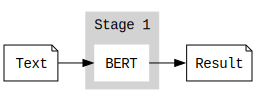

In [10]:
for classifier in ["SNER", "BiLSTM", "BERT"]:
    dot = graphviz.Digraph(
        f"single_stage_{classifier}",
        comment="Single Stage",
        format="svg",
        node_attr={"shape": "box", "rankdir": "LR"},
    )
    dot.attr(rankdir="LR")
    dot.attr(splines="line")
    dot.attr(fontname="Courier New")
    dot.node_attr.update(fontname="Courier New")

    with dot.subgraph(name="cluster_c1") as c:
        c.attr(
            style="filled",
            color="lightgrey",
        )
        c.node_attr.update(
            style="filled", color="white", fontname="Courier New"
        )
        c.node("C_1", classifier)
        c.attr(label="Stage 1")

    dot.node("TEXT", "Text", shape="note")
    dot.node("RESULT", "Result", shape="note")

    dot.edge("TEXT", "C_1")

    dot.edge("C_1", "RESULT")

    dot.render(directory=savepath).replace("\\", "/")

dot

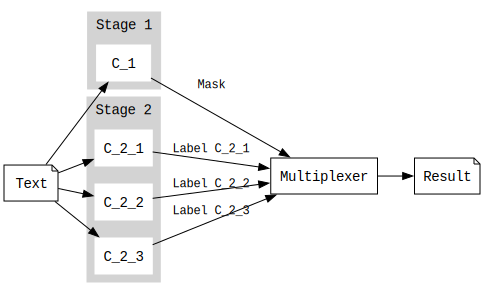

In [11]:
dot = graphviz.Digraph(
    "multiplexer",
    comment="Multiplexer",
    format="svg",
    node_attr={"shape": "box", "rankdir": "LR"},
)
dot.attr(rankdir="LR")
dot.attr(splines="line")
dot.attr(fontname="Courier New")
dot.node_attr.update(fontname="Courier New")

with dot.subgraph(name="cluster_c1") as c:
    c.attr(
        style="filled",
        color="lightgrey",
    )
    c.node_attr.update(style="filled", color="white", fontname="Courier New")
    c.node("C_1", "C_1")
    c.attr(label="Stage 1")


with dot.subgraph(name="cluster_c2") as c2:
    c2.attr(style="filled", color="lightgrey")
    c2.node_attr.update(style="filled", color="white", fontname="Courier New")
    c2.node("C_2_1", "C_2_1")
    c2.node("C_2_2", "C_2_2")
    c2.node("C_2_3", "C_2_3")
    c2.attr(label="Stage 2")

dot.node("TEXT", "Text", shape="note")
dot.node("RESULT", "Result", shape="note")

dot.node("MUX", "Multiplexer")


dot.edge("TEXT", "C_1")
dot.edge(
    "TEXT",
    "C_2_1",
)
dot.edge(
    "TEXT",
    "C_2_2",
)
dot.edge(
    "TEXT",
    "C_2_3",
)


dot.edge("C_1", "MUX", label="Mask", fontname="Courier New", fontsize="12")
dot.edge(
    "C_2_1", "MUX", label="Label C_2_1", fontname="Courier New", fontsize="12"
)
dot.edge(
    "C_2_2", "MUX", label="Label C_2_2", fontname="Courier New", fontsize="12"
)
dot.edge(
    "C_2_3", "MUX", label="Label C_2_3", fontname="Courier New", fontsize="12"
)

dot.edge("MUX", "RESULT")


dot.render(directory=savepath).replace("\\", "/")
dot

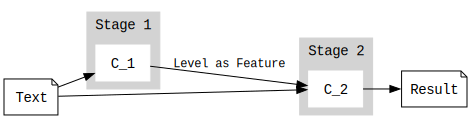

In [12]:
dot = graphviz.Digraph(
    "feature_engineering",
    comment="Feature Engineering",
    format="svg",
    node_attr={"shape": "box", "rankdir": "LR"},
)
dot.attr(rankdir="LR")
dot.attr(splines="line")
dot.attr(fontname="Courier New")
dot.node_attr.update(fontname="Courier New")

with dot.subgraph(name="cluster_c1") as c:
    c.attr(
        style="filled",
        color="lightgrey",
    )
    c.node_attr.update(style="filled", color="white", fontname="Courier New")
    c.node("C_1", "C_1")
    c.attr(label="Stage 1")


with dot.subgraph(name="cluster_c2") as c2:
    c2.attr(style="filled", color="lightgrey")
    c2.node_attr.update(style="filled", color="white", fontname="Courier New")
    c2.node("C_2", "C_2")
    c2.attr(label="Stage 2")

dot.node("TEXT", "Text", shape="note")
dot.node("RESULT", "Result", shape="note")


dot.edge("TEXT", "C_1")
dot.edge(
    "TEXT",
    "C_2",
)
dot.edge(
    "C_1",
    "C_2",
    fontname="Courier New",
    fontsize="12",
    label="Level as Feature",
)


dot.edge("C_2", "RESULT")

dot.render(directory=savepath).replace("\\", "/")

dot

In [15]:
for classifier in ["SNER", "BILSTM", "BERT", "Simulated"]:
    dot = graphviz.Digraph(
        f"feature_engineering_{classifier}",
        comment="Feature Engineering",
        format="svg",
        node_attr={"shape": "box", "rankdir": "LR"},
    )
    dot.attr(rankdir="LR")
    dot.attr(splines="line")
    dot.attr(fontname="Courier New")
    dot.node_attr.update(fontname="Courier New")

    with dot.subgraph(name="cluster_c1") as c:
        c.attr(
            style="filled",
            color="lightgrey",
        )
        c.node_attr.update(
            style="filled", color="white", fontname="Courier New"
        )
        c.node("C_1", classifier)
        c.attr(label="Stage 1")

    with dot.subgraph(name="cluster_c2") as c2:
        c2.attr(style="filled", color="lightgrey")
        c2.node_attr.update(
            style="filled", color="white", fontname="Courier New"
        )
        c2.node("C_2", "BERT")
        c2.attr(label="Stage 2")

    dot.node("TEXT", "Text", shape="note")
    dot.node("RESULT", "Result", shape="note")

    dot.edge("TEXT", "C_1")
    dot.edge(
        "TEXT",
        "C_2",
    )
    dot.edge(
        "C_1",
        "C_2",
        fontname="Courier New",
        fontsize="12",
        label="Level as Feature",
    )

    dot.edge("C_2", "RESULT")

    dot.render(directory=savepath).replace("\\", "/")

    dot

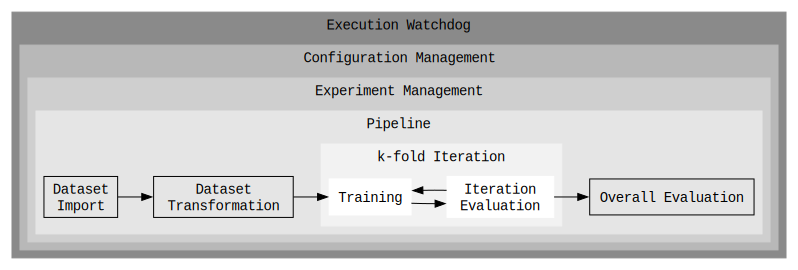

In [13]:
dot = graphviz.Digraph(
    "experiment",
    comment="experiment schema",
    format="png",
    node_attr={"shape": "box", "rankdir": "LR"},
)
dot.attr(rankdir="LR")

dot.attr(fontname="Courier New")
dot.node_attr.update(fontname="Courier New")

with dot.subgraph(name="cluster_watchdog") as wat:
    wat.attr(
        style="filled",
        color="grey54",
    )
    wat.attr(label="Execution Watchdog")

    with wat.subgraph(name="cluster_config") as con:
        con.attr(
            style="filled",
            color="grey72",
        )
        con.attr(label="Configuration Management")

        with con.subgraph(name="cluster_mlflow") as mlflow:
            mlflow.attr(
                style="filled",
                color="grey81",
            )
            mlflow.attr(label="Experiment Management")

            with mlflow.subgraph(name="cluster_pipeline") as pipeline:
                pipeline.attr(
                    style="filled",
                    color="grey90",
                )
                pipeline.attr(label="Pipeline")

                pipeline.node("1", "Dataset\n Import")
                pipeline.node("2", "Dataset\n Transformation")

                with pipeline.subgraph(name="cluster_c1") as c:
                    c.attr(
                        style="filled",
                        color="grey95",
                    )
                    c.node_attr.update(
                        style="filled", color="white", fontname="Courier New"
                    )
                    c.attr(label="k-fold Iteration")

                    c.node("B", "Training")
                    c.node("C", "Iteration\n Evaluation")

                pipeline.node("4", "Overall Evaluation")

                pipeline.edges(["12", "2B", "BC", "CB", "C4"])


dot.render(directory=savepath).replace("\\", "/")

dot


dot

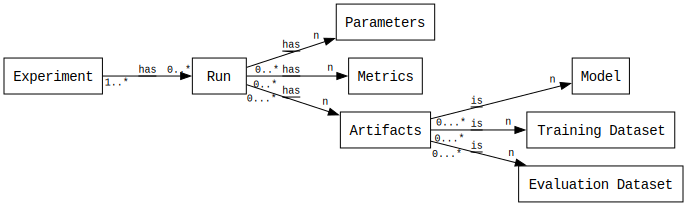

In [14]:
dot = graphviz.Digraph(
    "domain_model",
    comment="Domain Model",
    format="png",
    node_attr={"shape": "box", "rankdir": "TB"},
)
dot.attr(rankdir="LR")
dot.attr(ranksep="1")

dot.attr()
dot.attr(fontname="Courier New")
dot.node_attr.update(fontname="Courier New")
dot.edge_attr.update(fontname="Courier New")


dot.node("EXP", "Experiment")
dot.node("RUN", "Run")
dot.node("PARAM", "Parameters")
dot.node("METRIC", "Metrics")
dot.node("ARTI", "Artifacts")
dot.node("MODEL", "Model")
dot.node("DATA_T", "Training Dataset")
dot.node("DATA_E", "Evaluation Dataset")


dot.edge(
    "EXP",
    "RUN",
    taillabel="1..*",
    headlabel="0..*",
    label="has",
    labeldistance="1.5",
    labelfloat="false",
    decorate="true",
    fontsize="10",
)
dot.edge(
    "RUN",
    "PARAM",
    taillabel="0..*",
    headlabel="n",
    label="has",
    labeldistance="2.0",
    labelfloat="false",
    decorate="true",
    fontsize="10",
)
dot.edge(
    "RUN",
    "METRIC",
    taillabel="0..*",
    headlabel="n",
    label="has",
    labeldistance="2.0",
    labelfloat="false",
    decorate="true",
    fontsize="10",
)
dot.edge(
    "RUN",
    "ARTI",
    taillabel="0...*",
    headlabel="n",
    label="has",
    labeldistance="2.0",
    labelfloat="false",
    decorate="true",
    fontsize="10",
)

dot.edge(
    "ARTI",
    "MODEL",
    taillabel="0...*",
    headlabel="n",
    label="is",
    labeldistance="2.0",
    labelfloat="false",
    decorate="true",
    fontsize="10",
)

dot.edge(
    "ARTI",
    "DATA_T",
    taillabel="0...*",
    headlabel="n",
    label="is",
    labeldistance="2.0",
    labelfloat="false",
    decorate="true",
    fontsize="10",
)

dot.edge(
    "ARTI",
    "DATA_E",
    taillabel="0...*",
    headlabel="n",
    label="is",
    labeldistance="2.0",
    labelfloat="false",
    decorate="true",
    fontsize="10",
)


dot.render(directory=savepath).replace("\\", "/")

dot